#Libraries

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

# Gabor Filters

## Parameters

In [15]:

ksize = 5  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 3 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi /4  #1/4 works best for angled. 
gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  #Phase offset. I leave it to 0. 

## Kernel

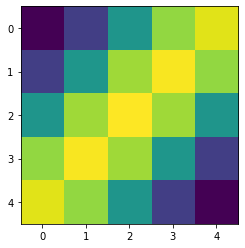

In [16]:

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

## Upload Images

In [ ]:
from google.colab import files
files.upload()

## Load Images and apply kernel

In [32]:
imgs = [cv2.imread(x) for x in glob.glob("*.jpg")]
imgs = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in imgs]
fimgs = [cv2.filter2D(x, cv2.CV_8UC3, kernel) for x in imgs]

## Visualize

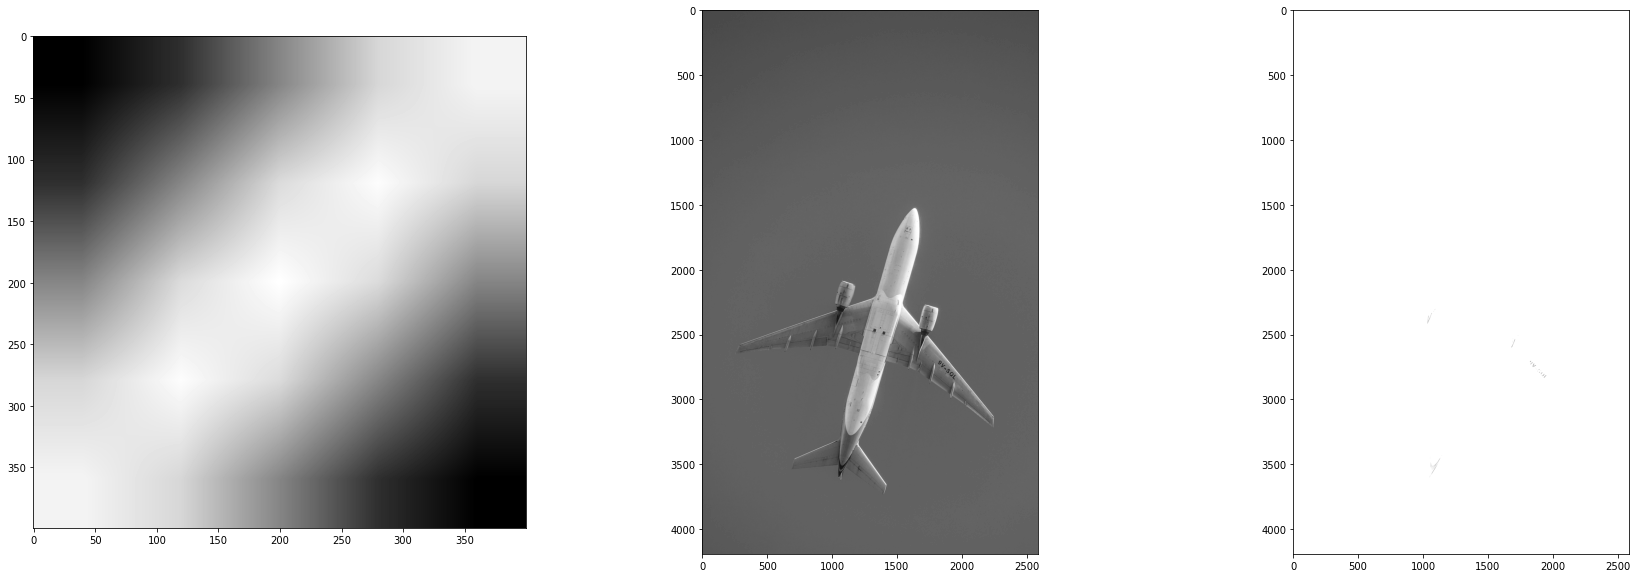

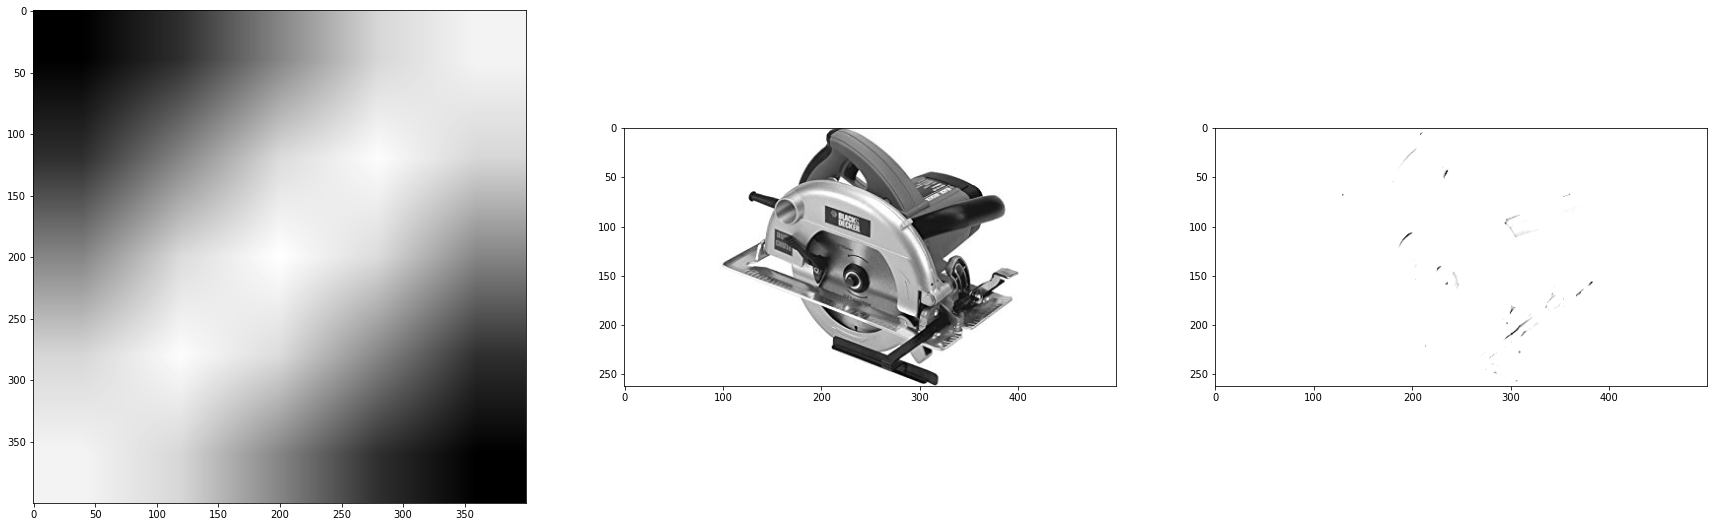

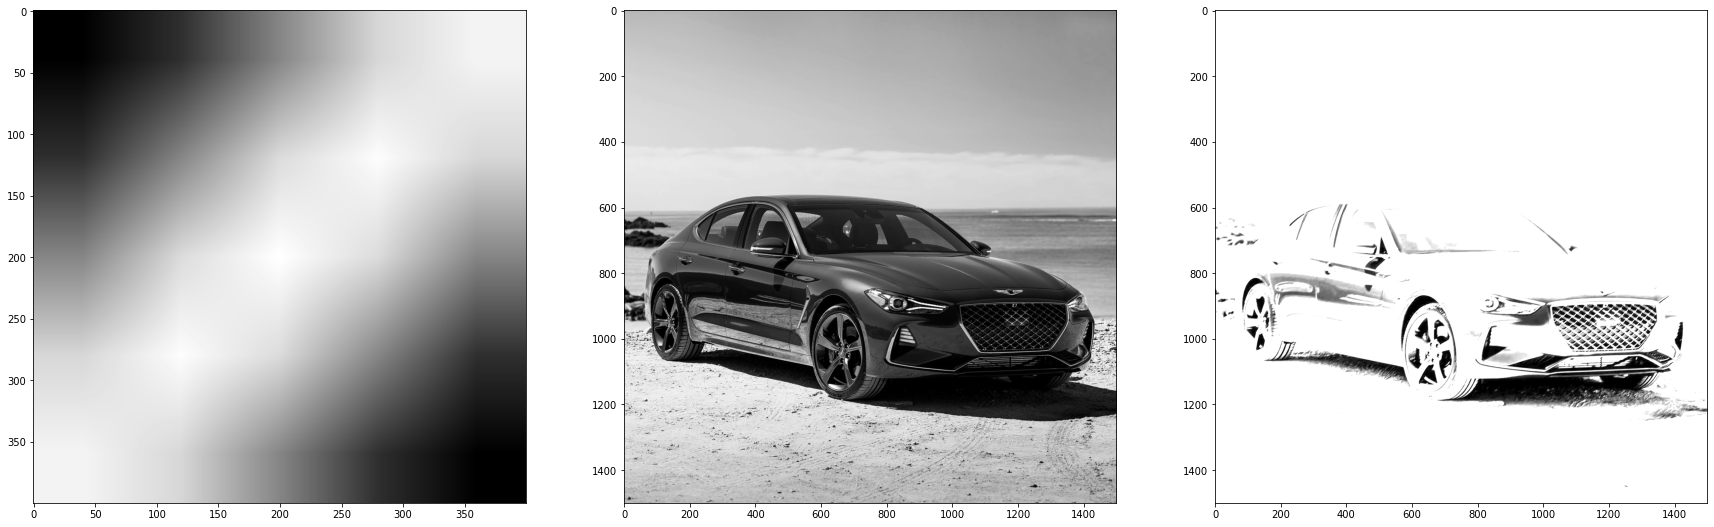

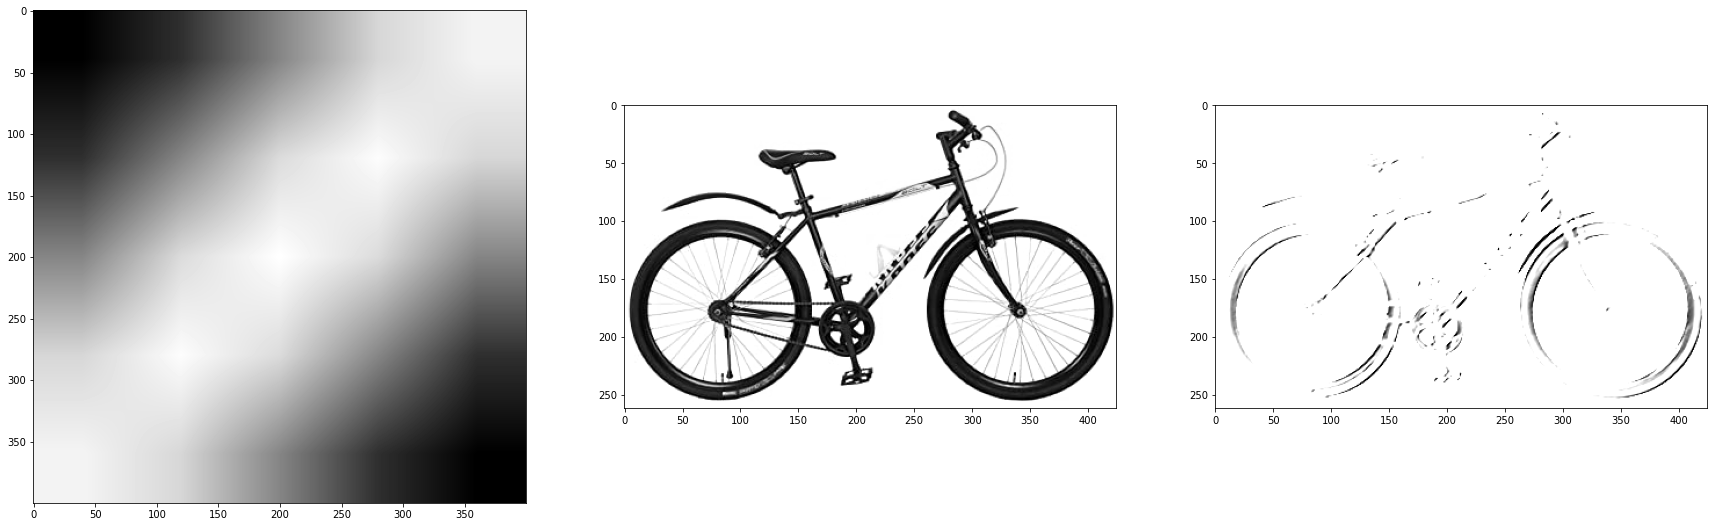

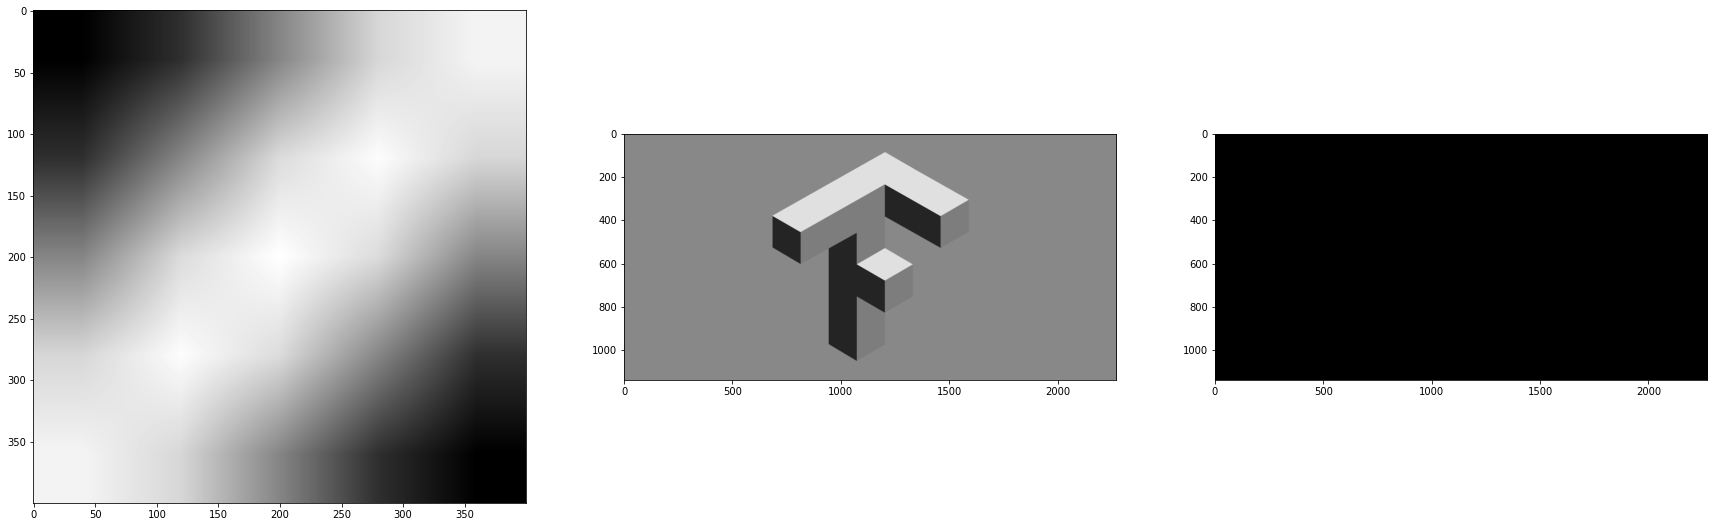

In [33]:
for img , fimg in zip(imgs,fimgs):
  kernel_resized = cv2.resize(kernel, (400, 400))
  fig,ax = plt.subplots(1,3,figsize=(30,10))     
  ax[0].imshow(kernel_resized,cmap='gray',)
  ax[1].imshow(img , cmap='gray')
  ax[2].imshow(fimg,cmap='gray')
  plt.show()


# Image Pyamid - PyrUP

## Load Image

In [75]:
img = cv2.imread(glob.glob('*.jpg')[1])

## gaussian Pytamid

In [76]:
layer = img.copy()
gaussian_pyramid = [layer]
for i in range(6):
  layer = cv2.pyrDown(layer)
  gaussian_pyramid.append(layer)

## Laplacian Pyramid

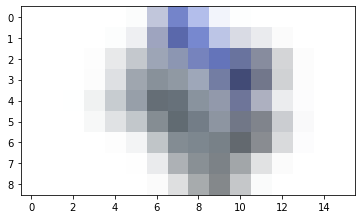

In [77]:
# Laplacian Pyramid
layer = gaussian_pyramid[5]
plt.imshow(layer)
laplacian_pyramid = [layer]

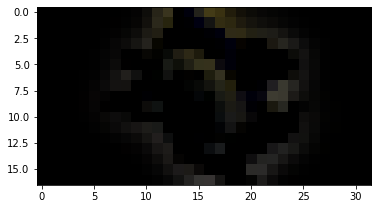

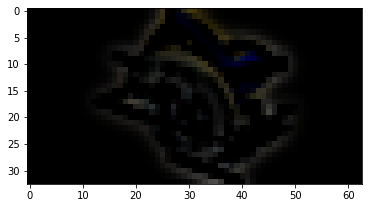

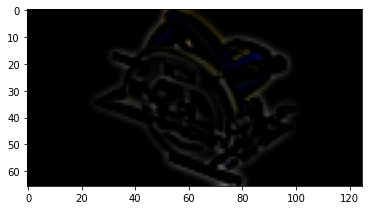

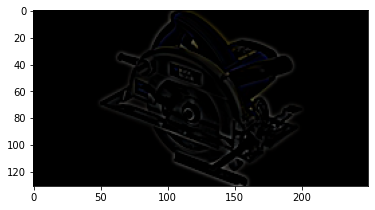

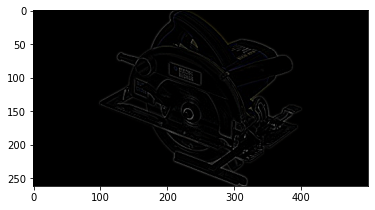

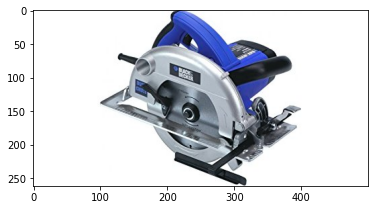

In [78]:
for i in range(5, 0, -1):
  s1 = gaussian_pyramid[i-1].shape[1]
  s2 = gaussian_pyramid[i-1].shape[0]
  size = (s1,s2 )
  gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
  laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
  laplacian_pyramid.append(laplacian)
  plt.imshow(laplacian)
  plt.show()

plt.imshow(img)


## Load Image -PyrDown

In [83]:
img = cv2.imread(glob.glob('*.jpg')[3])

## gaussian Pytamid

In [84]:
layer = img.copy()
gaussian_pyramid = [layer]
for i in range(6):
  layer = cv2.pyrUp(layer)
  gaussian_pyramid.append(layer)

## Laplacian Pyramid

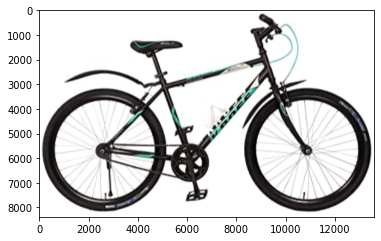

In [85]:
# Laplacian Pyramid
layer = gaussian_pyramid[5]
plt.imshow(layer)
laplacian_pyramid = [layer]

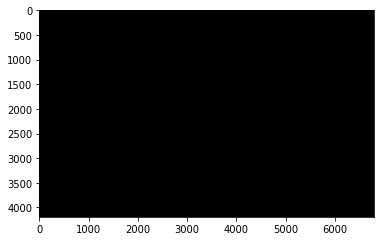

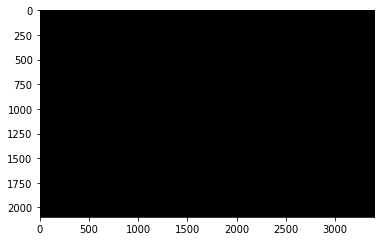

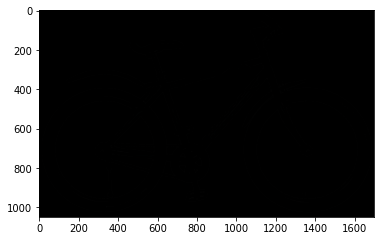

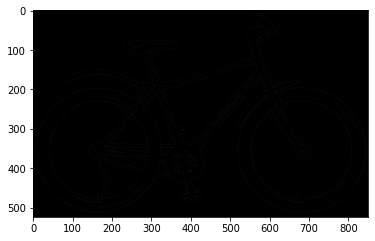

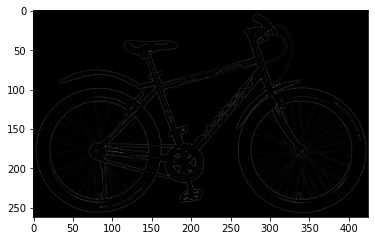

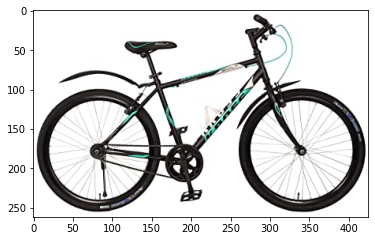

In [86]:
for i in range(5, 0, -1):
  s1 = gaussian_pyramid[i-1].shape[1]
  s2 = gaussian_pyramid[i-1].shape[0]
  size = (s1,s2 )
  gaussian_expanded = cv2.pyrDown(gaussian_pyramid[i], dstsize=size)
  laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
  laplacian_pyramid.append(laplacian)
  plt.imshow(laplacian)
  plt.show()

plt.imshow(img)
